In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math

In [3]:
from importlib import reload  # Python 3.4+
from Classes.compounds import CompoundList
import Scraper
from Scraper import readCompoundsRecipes

Scraper = reload(Scraper)

aggregatedCompounds = CompoundList()


In [ ]:
### from list of copy paste modules to pretty list of modules

fileName = "ModuleLists/Metabolic_pathways_map01100.txt" # CHANGE
with open(fileName, 'r') as file:
    moduleCodes = [line.replace("\n","")[:6] for line in file.readlines()]
print(moduleCodes)
with open(fileName, "w+") as file:
    file.write("\n".join(moduleCodes))


['M00001', 'M00002', 'M00003', 'M00004', 'M00005', 'M00006', 'M00007', 'M00008', 'M00009', 'M00010', 'M00011', 'M00012', 'M00013', 'M00014', 'M00015', 'M00016', 'M00017', 'M00018', 'M00019', 'M00020', 'M00021', 'M00022', 'M00023', 'M00024', 'M00025', 'M00026', 'M00027', 'M00028', 'M00029', 'M00030', 'M00031', 'M00032', 'M00033', 'M00034', 'M00035', 'M00036', 'M00037', 'M00038', 'M00039', 'M00040', 'M00042', 'M00043', 'M00044', 'M00045', 'M00046', 'M00047', 'M00048', 'M00049', 'M00050', 'M00051', 'M00052', 'M00053', 'M00055', 'M00056', 'M00057', 'M00058', 'M00059', 'M00060', 'M00061', 'M00063', 'M00064', 'M00065', 'M00066', 'M00067', 'M00068', 'M00069', 'M00070', 'M00071', 'M00072', 'M00073', 'M00074', 'M00075', 'M00076', 'M00077', 'M00078', 'M00079', 'M00081', 'M00082', 'M00083', 'M00085', 'M00086', 'M00087', 'M00088', 'M00089', 'M00090', 'M00091', 'M00092', 'M00093', 'M00094', 'M00095', 'M00096', 'M00097', 'M00098', 'M00099', 'M00100', 'M00101', 'M00102', 'M00103', 'M00104', 'M00106',

In [ ]:
### RUN THIS ONE TO LOAD DATA
import Scraper
Scraper = reload(Scraper)

compounds, reactions = Scraper.readCompoundsRecipes("savedCompounds","savedReactions")
print("\n[COMPOUNDS]", len(compounds), compounds)
print("\n[REACTIONS]", len(reactions), reactions)
# print("\n[COMPOUNDS]", len(compounds))
# print("\n[REACTIONS]", len(reactions))

# compound_code_to_name_dict = {comp.split(", ")[0]:comp.split(", ")[1] for comp in compounds}
# compound_code_to_int_dict  = {comp.split(", ")[0]:i for i,comp in enumerate(compounds)}
# print([comp for comp in compounds if len(comp)!=2])
compound_code_to_name_dict = {comp[0]:comp[1] for comp in compounds}
compound_code_to_int_dict  = {comp[0]:i for i,comp in enumerate(compounds)}
compound_int_to_code_dict  = {i:comp for comp, i in compound_code_to_int_dict.items()}
print(len(compound_code_to_name_dict), compound_code_to_name_dict)
print(len(compound_code_to_int_dict), compound_code_to_int_dict)
print(len(compound_int_to_code_dict), compound_int_to_code_dict)



[COMPOUNDS] 1872 [['C00267', 'alpha-D-Glucose'], ['C00668', 'alpha-D-Glucose 6-phosphate'], ['C00085', 'D-Fructose 6-phosphate'], ['C00354', 'D-Fructose 1,6-bisphosphate'], ['C00111', 'Glycerone phosphate'], ['C00118', 'D-Glyceraldehyde 3-phosphate'], ['C00236', '3-Phospho-D-glyceroyl phosphate'], ['C00197', '3-Phospho-D-glycerate'], ['C00631', '2-Phospho-D-glycerate'], ['C00074', 'Phosphoenolpyruvate'], ['C00022', 'Pyruvate'], ['C00036', 'Oxaloacetate'], ['C00024', 'Acetyl-CoA'], ['C00068', 'Thiamin diphosphate'], ['C05125', '2-alpha-Hydroxyethylthiamine diphosphate'], ['C15972', 'Enzyme N6-lipoyllysine'], ['C16255', '[Dihydrolipoyllysine-residue acetyltransferase] S-acetyldihydrolipoyllysine'], ['C15973', 'Enzyme N6-dihydrolipoyllysine'], ['C01172', 'beta-D-Glucose 6-phosphate'], ['C01236', 'D-Glucono-1,5-lactone 6-phosphate'], ['C00345', '6-Phospho-D-gluconate'], ['C00199', 'D-Ribulose 5-phosphate'], ['C00231', 'D-Xylulose 5-phosphate'], ['C00117', 'D-Ribose 5-phosphate'], ['C05382

### DRAW GRAPHS

In [37]:
def buildConfusionMatrix(compounds, reactions, code_to_int):
    n_compounds = len(compounds)
    A = np.zeros((n_compounds, n_compounds))
    A = [[[] for _ in range(n_compounds)] for _ in range(n_compounds)]

    for react in reactions:
        #print("RIAÇÂO", react)
        for ingredient in react[1]:
            for product in react[2]:
                for react_code in react[0]:
                    if react_code not in A[code_to_int[ingredient]][code_to_int[product]]:
                        A[code_to_int[ingredient]][code_to_int[product]] += [react_code]

    A_ = np.array([[len(entry) for entry in line] for line in A])
    #print("A:\n", A)
    print(f"A:\n{A[0]} \n{[A[i][0] for i in range(len(A))]}")
    print(f"A:\n{[len(A[i]) for i in range(len(A))]}")
    print("\nA_:\n", A_)

    #return np.array(A), A_
    return A_, A_

In [27]:
## find duplicates
r = {}
for comp in compounds:
    if comp[0] == "C03758": print(f" []:{comp}")
    if comp[0] in r.keys():
        r[comp[0]] += 1
        print(comp)
    else:
        r[comp[0]] = 1


 []:['C03758', '4-2-Aminoethyl-1,2-benzenediol']


In [39]:

#A, A_ = buildConfusionMatrix(compounds, reactions, compound_code_to_int_dict)
A, A_ = buildConfusionMatrix(compounds, reactions, compound_code_to_int_dict)
print(A.shape, A_.shape)

eigenval, eigenvec = np.linalg.eig(A_)
# print("VALUES:", np.absolute(eigenval))
# print("VECTOR:\n", list(zip(compound_code_to_name_dict.values(), np.absolute(eigenvec[1, :]))))
# print("VECTOR:\n", "\n".join([str([it1,it2]) for it1,it2 in zip(compound_code_to_name_dict.values(), np.absolute(eigenvec[1, :]))]))
# # print("VECTORS:\n",  eigenvec)

node_labels = {intt:compound_code_to_name_dict[code]+f"\n{np.absolute(eigenvec[0, intt]):.3f}" for intt,code in compound_int_to_code_dict.items()}


A:
[[], ['R01786', 'R02189', 'R09085'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], 

In [ ]:
import itertools as it

def draw_simple_graph(A):
    plt.figure(figsize=(30,30))
    #rows, cols = np.where(A == 1)
    rows, cols = np.where(A >= 1)
    edges = zip(rows.tolist(), cols.tolist(), A[rows,cols])
    edges = zip(rows.tolist(), cols.tolist())
    #print("EDGES:", list(edges))
    gr = nx.DiGraph()
    
    gr.add_edges_from(list(edges))
    #pos = nx.spring_layout(gr, seed=42)
    pos = nx.circular_layout(gr)
    #pos = {i:(math.cos(i*2*0.5*math.pi/len(A)), math.sin(i*4*math.pi/len(A))) for i in range(len(A))}
    #pos = nx.spring_layout(gr, iterations=500, k=1, pos=pos)
    pos = nx.kamada_kawai_layout(gr, weight=None, pos=pos) # to ignore weight
    #nx.draw(gr, pos, node_size=100, width=0)
    #nx.draw_networkx_nodes(gr, pos)
    # nx.draw(gr, pos, arrows=True, arrowstyle="->", arrowsize=20, width=1.5, node_size=200) ## ERA ESTE
    nx.draw_networkx(gr, pos, with_labels=False, arrows=False, node_size=10, width=0.5) #, node_size=100)
    
    plt.savefig(f"Graph{len(A)}.png")
    plt.show()


# DRAW SOME GRAPHS
def draw_graph(A, node_labels:list):
    plt.figure(figsize=(8,8))
    #rows, cols = np.where(A == 1)
    rows, cols = np.where(A >= 1)
    edges = zip(rows.tolist(), cols.tolist(), A[rows,cols])
    #print("EDGES:", list(edges))
    gr = nx.DiGraph()
    gr = nx.MultiDiGraph()
    gr.add_weighted_edges_from(edges, weight="weight")
    #pos = nx.spring_layout(gr, seed=42)
    pos = nx.circular_layout(gr)
    pos = nx.kamada_kawai_layout(gr, weight=None) # to ignore weight
    nx.draw(gr, pos, node_size=100, width=0)
    nx.draw_networkx_nodes(gr, pos)
    #nx.draw(gr, pos, arrows=True, arrowstyle="->", arrowsize=20, width=1.5, node_size=200) ## ERA ESTE
    #nx.draw_networkx(gr, pos, arrows=True, node_size=100) #, node_size=100)
    connectionstyle = [f"arc3, rad={r}" for r in it.accumulate([0.15] * 3)]
    print(connectionstyle)

    curved_edges = [edge for edge in gr.edges(data=True) if tuple(reversed(edge[:2])) in list(gr.edges())] 
    straight_edges = [(node1,node2,weight) for node1,node2,weight in gr.edges(data=True) if (node1,node2,weight) not in curved_edges]
    #print(len(curved_edges), curved_edges)
    #print(len(straight_edges), straight_edges)

    all_weights = []
    for (node1,node2,data) in gr.edges(data=True):
        all_weights.append(data['weight'])
    unique_weights = list(set(all_weights))

    for weight in unique_weights:
        weighted_straight_edges = [(node1,node2) for (node1,node2,edge_attr) in straight_edges if edge_attr['weight']==weight]
        weighted_curved_edges   = [(node1,node2) for (node1,node2,edge_attr) in curved_edges   if edge_attr['weight']==weight]
        width = weight
        #nx.draw_networkx_edges(gr,pos, edgelist=weighted_edges, width=width, arrowstyle="->", connectionstyle=connectionstyle[0])
        nx.draw_networkx_edges(gr,pos, edge_color="grey", edgelist=weighted_curved_edges, width=width, arrowstyle="->", connectionstyle=connectionstyle[0])
        nx.draw_networkx_edges(gr,pos, edge_color="grey", edgelist=weighted_straight_edges, width=width, arrowstyle="->")

    nx.draw_networkx_labels(gr, pos, labels=node_labels, font_size=7)
    #nx.draw_networkx_edges( gr, pos, edge_color="grey", connectionstyle=connectionstyle[1]) #, ax=ax)
    plt.show()

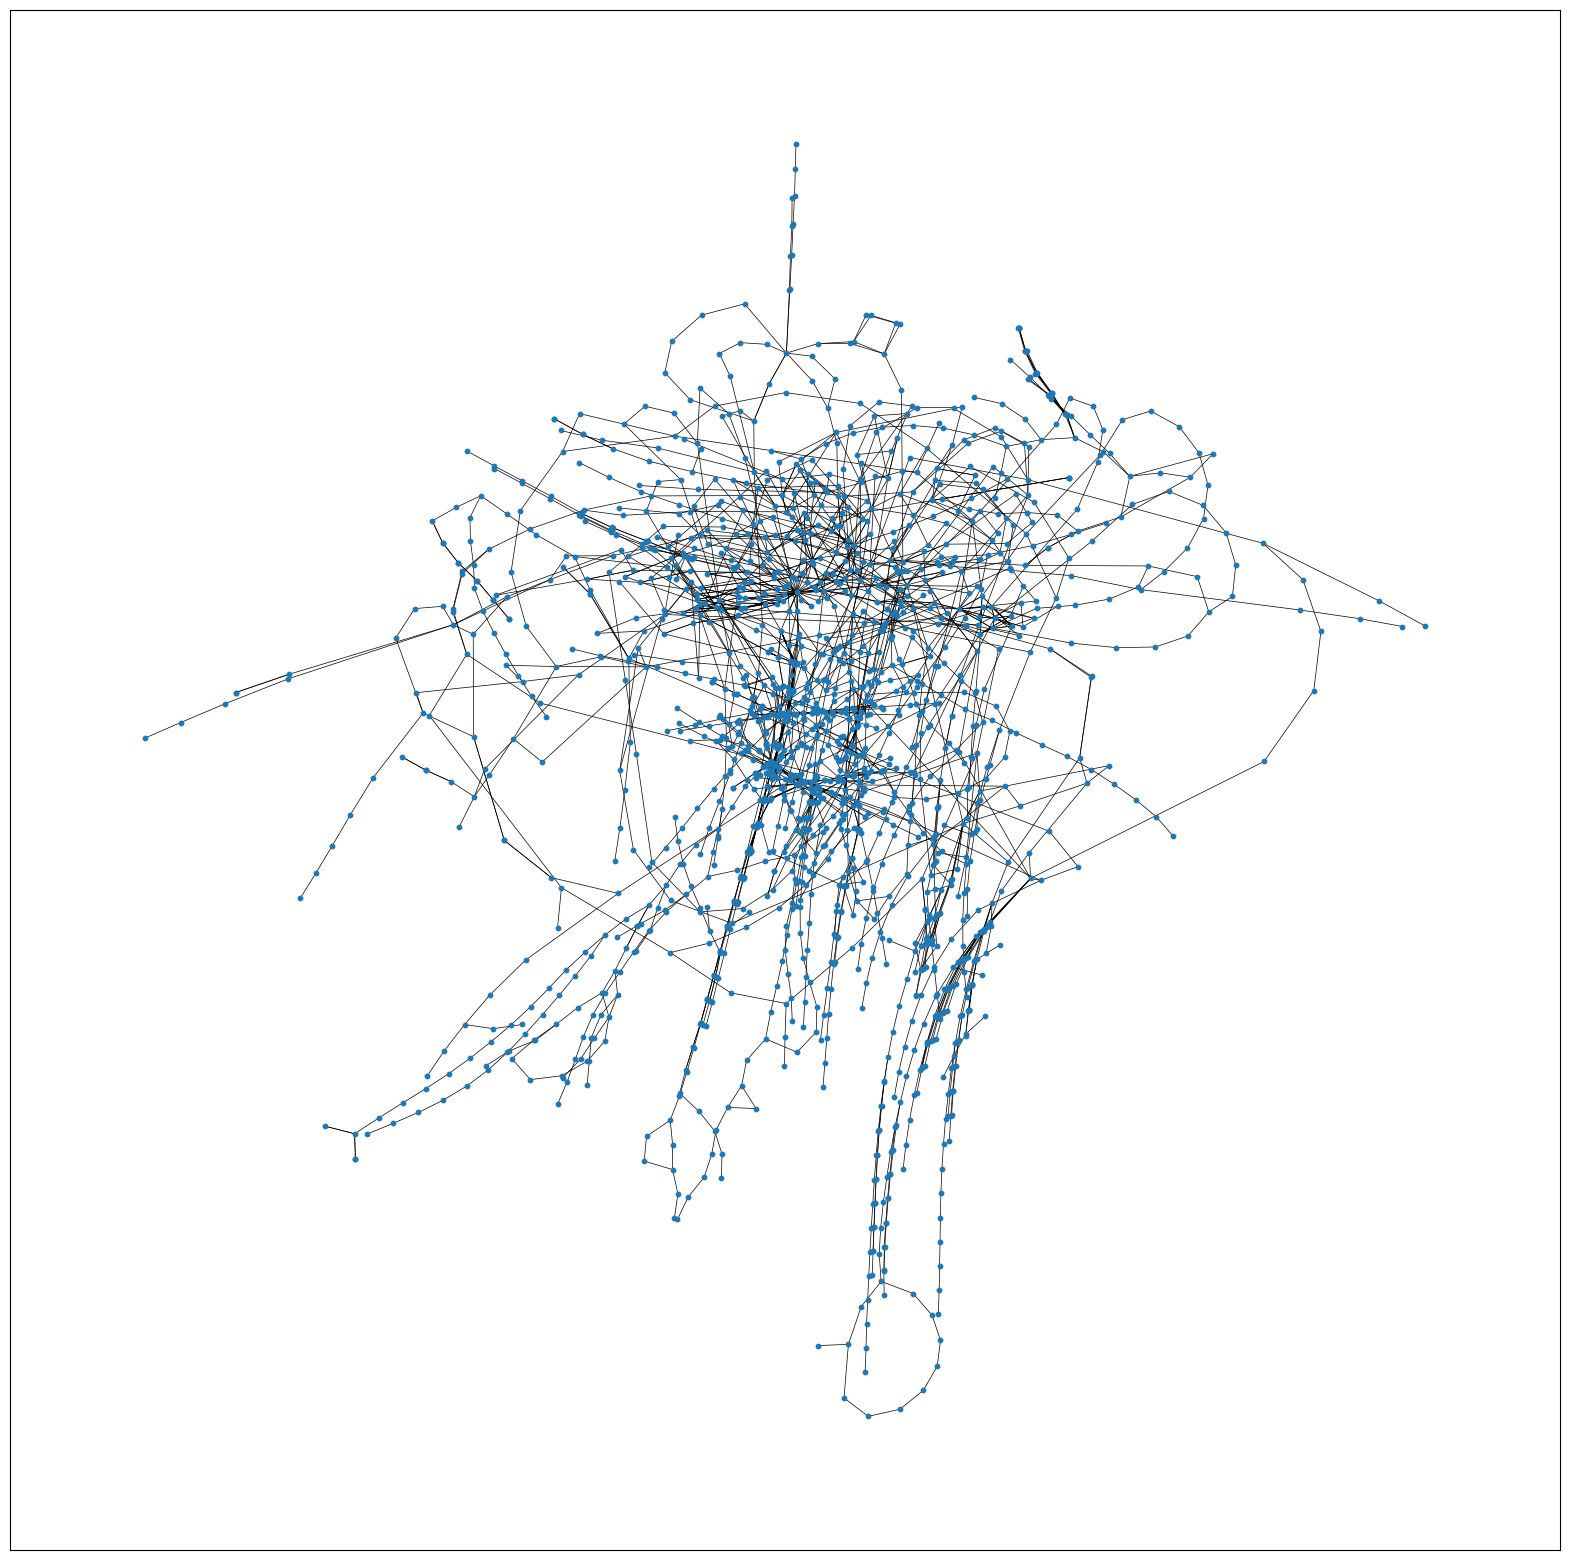

In [153]:

# draw_graph(A_, node_labels)
# draw_simple_graph(A_[:1000,:1000])
draw_simple_graph(A_)
#draw_simple_graph(A_)

## Torch stuff

In [5]:
import torch
from torch_geometric.data import HeteroData

# 1. Build compound and reaction ID maps
compound_ids = set()
reaction_ids = set()

for reaction_group, substrates, products in reactions:
    compound_ids.update(substrates)
    compound_ids.update(products)
    reaction_ids.update(reaction_group)

compound_id2idx = {cid: i for i, cid in enumerate(sorted(compound_ids))}
reaction_id2idx = {rid: i for i, rid in enumerate(sorted(reaction_ids))}

# 2. Initialize HeteroData
data = HeteroData()

# 3. Compound nodes
num_compounds = len(compound_id2idx)
data['compound'].x = torch.eye(num_compounds)  # One-hot encoding (or use learnable embedding)

# 4. Reaction nodes
num_reactions = len(reaction_id2idx)
data['reaction'].x = torch.eye(num_reactions)  # One-hot reaction type embedding

# 5. Build edges
subs_src, subs_dst = [], []
prod_src, prod_dst = [], []

for reaction_group, substrates, products in reactions:
    for rid in reaction_group:
        r_idx = reaction_id2idx[rid]
        for cid in substrates:
            c_idx = compound_id2idx[cid]
            subs_src.append(c_idx)
            subs_dst.append(r_idx)
        for cid in products:
            c_idx = compound_id2idx[cid]
            prod_src.append(r_idx)
            prod_dst.append(c_idx)

# 6. Assign edge_index tensors
data['compound', 'is_substrate', 'reaction'].edge_index = torch.tensor([subs_src, subs_dst], dtype=torch.long)
data['reaction', 'produces', 'compound'].edge_index = torch.tensor([prod_src, prod_dst], dtype=torch.long)
data


HeteroData(
  compound={ x=[1870, 1870] },
  reaction={ x=[2158, 2158] },
  (compound, is_substrate, reaction)={ edge_index=[2, 2425] },
  (reaction, produces, compound)={ edge_index=[2, 2365] }
)

In [6]:
print(data.get_all_edge_attrs())
print(data.get_all_tensor_attrs())
print(len(compounds), len(reactions))
print(data.edge_index_dict)

[EdgeAttr(edge_type=('compound', 'is_substrate', 'reaction'), layout=<EdgeLayout.COO: 'coo'>, is_sorted=False, size=None), EdgeAttr(edge_type=('reaction', 'produces', 'compound'), layout=<EdgeLayout.COO: 'coo'>, is_sorted=False, size=None)]
[TensorAttr(group_name='compound', attr_name='x', index=<_FieldStatus.UNSET: None>), TensorAttr(group_name='reaction', attr_name='x', index=<_FieldStatus.UNSET: None>)]
1872 2118
{('compound', 'is_substrate', 'reaction'): tensor([[ 162,  162,  162,  ...,  341,  645,  341],
        [ 349,  425, 1474,  ..., 2155, 2153,  187]]), ('reaction', 'produces', 'compound'): tensor([[ 349,  425, 1474,  ..., 2153,  187,  187],
        [ 292,  292,  292,  ...,  341,  268,   70]])}


### Train part

In [7]:
# positive edges
from torch_geometric.utils import negative_sampling

pos_edge_index = data['reaction', 'produces', 'compound'].edge_index
edge_index = data['reaction', 'produces', 'compound'].edge_index
num_edges = edge_index.size(1)

perm = torch.randperm(num_edges)
train_proportion = 0.8
valid_proportion = 0.2
train_ei = edge_index[:, perm[:int(train_proportion * num_edges)]]
val_ei   = edge_index[:, perm[int(train_proportion * num_edges):int((train_proportion+valid_proportion) * num_edges)]]
test_ei  = edge_index[:, perm[int((train_proportion+valid_proportion) * num_edges):]]


neg_val_ei = negative_sampling(
    edge_index=train_ei,
    num_nodes=(data['reaction'].num_nodes, data['compound'].num_nodes),
    num_neg_samples=val_ei.size(1)
)


#### encoder + link predictor


In [36]:
from torch_geometric.nn import HeteroConv, GATConv
import torch.nn.functional as F

class GNNEncoder(torch.nn.Module):
    def __init__(self, metadata, hidden_dim=64, n_heads=1, n_layers=1):
        super().__init__()
        self.n_layers = n_layers
        self.compound_emb = torch.nn.Embedding(num_compounds, hidden_dim)
        self.reaction_emb = torch.nn.Embedding(num_reactions, hidden_dim)
        self.conv = HeteroConv({
            ('compound', 'is_substrate', 'reaction'): GATConv(-1, hidden_dim, heads=n_heads, dropout=0.1, add_self_loops=False),
            ('reaction', 'produces', 'compound'):     GATConv(-1, hidden_dim, heads=n_heads, dropout=0.1, add_self_loops=False),
        }, aggr='sum')

    def forward(self, x_dict, edge_index_dict):
        # print(x_dict["compound"].shape, x_dict["reaction"].shape)
        x_dict['compound'] = self.compound_emb(x_dict['compound'].argmax(dim=1)) ### REMOVED THIS ONE
        x_dict['reaction'] = self.reaction_emb(x_dict['reaction'].argmax(dim=1)) ### REMOVED THIS ONE
        # print(x_dict["compound"].shape, x_dict["reaction"].shape)
        for l in range(self.n_layers):
            #print(x_dict["compound"].shape, x_dict["reaction"].shape)
            x_dict = self.conv(x_dict, edge_index_dict)
        return x_dict


# RuntimeError: mat1 and mat2 shapes cannot be multiplied (2010x32 and 128x16) $4
# RuntimeError: mat1 and mat2 shapes cannot be multiplied (2010x32 and 64x16)  $2

class LinkPredictor(torch.nn.Module):
    def __init__(self, hidden_dim, n_heads=1):
        super().__init__()
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(2 * hidden_dim * n_heads, hidden_dim),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_dim, 1),
            torch.nn.Sigmoid()
        )
        self.bias = torch.nn.Parameter(torch.tensor([0.]))

    def forward(self, z_src, z_dst):
        z = torch.cat([z_src, z_dst], dim=-1)
        return self.mlp(z).squeeze()
        # return (z_src * z_dst).sum(dim=1)
        #return F.cosine_similarity(z_src, z_dst, dim=1)


#### Training loop

In [39]:
hidden_dim = 32
n_heads = 1
n_layers = 1
encoder = GNNEncoder(data.metadata(), hidden_dim=hidden_dim, n_heads=n_heads, n_layers=n_layers)
predictor = LinkPredictor(hidden_dim=hidden_dim, n_heads=n_heads)
optimizer = torch.optim.Adam(list(encoder.parameters()) + list(predictor.parameters()), lr=0.005)

print(encoder)
print(predictor)

train_loss = []
val_accuracy = []
pos_val_accuracy = []
neg_val_accuracy = []


n_epochs = 300
for epoch in range(n_epochs):
    encoder.train()
    predictor.train()

    z_dict = encoder(data.x_dict, data.edge_index_dict)

    # Positive examples
    # r_idx = pos_edge_index[0]
    # c_idx = pos_edge_index[1]
    r_idx = train_ei[0]
    c_idx = train_ei[1]
    pos_pred = predictor(z_dict['reaction'][r_idx], z_dict['compound'][c_idx])
    pos_label = torch.ones_like(pos_pred)

    # Negative examples
    # r_neg = neg_edge_index[0]
    # c_neg = neg_edge_index[1]
    r_neg = neg_val_ei[0]
    c_neg = neg_val_ei[1]
    neg_pred = predictor(z_dict['reaction'][r_neg], z_dict['compound'][c_neg])
    neg_label = torch.zeros_like(neg_pred)

    # Combine and compute loss
    pred = torch.cat([pos_pred, neg_pred])
    labels = torch.cat([pos_label, neg_label])
    loss = F.binary_cross_entropy_with_logits(pred, labels)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    

    # VALIDATION LOSS
    predictor.eval()
    r_val_idx = val_ei[0]
    c_val_idx = val_ei[1]
    # print(r_val_idx)
    # print(c_val_idx)
    val_pred = predictor(z_dict['reaction'][r_val_idx], z_dict['compound'][c_val_idx])
    val_label = torch.ones_like(val_pred)
    # print(val_pred.shape, val_pred)
    # print(val_label.shape, val_label)
    
    neg_val_ei = negative_sampling(
        edge_index=val_ei,
        num_nodes=(data['reaction'].num_nodes, data['compound'].num_nodes),
        num_neg_samples=val_ei.size(1)
    )
    r_neg = neg_val_ei[0]
    c_neg = neg_val_ei[1]
    neg_pred = predictor(z_dict['reaction'][r_neg], z_dict['compound'][c_neg])
    neg_label = torch.zeros_like(neg_pred)

    #print("[shapes]:", val_pred.shape, neg_pred.shape)
    val_pred = np.where(val_pred < 0.5, 0, np.ones_like(torch.clone(val_pred).detach().numpy()))
    neg_pred = np.where(neg_pred < 0.5, 0, np.ones_like(torch.clone(neg_pred).detach().numpy()))# [val_pred >= 0.5] = 0)
    #neg_pred = (np.ones_like(neg_pred)[neg_pred >= 0.5] = 0)
    # pred = torch.cat([val_pred, neg_pred])
    # labels = torch.cat([val_label, neg_label])
    pred = np.concatenate([val_pred, neg_pred])
    labels = np.concatenate([val_label, neg_label])


    n_preds = len(pred) // 2
    val_acc = (pred == labels).mean()
    pos_val_acc = (val_pred == labels[:n_preds]).mean()
    neg_val_acc = (neg_pred == labels[n_preds:]).mean()

    train_loss.append(loss.item())
    val_accuracy.append(val_acc)
    pos_val_accuracy.append(pos_val_acc)
    neg_val_accuracy.append(neg_val_acc)

    print(f"Epoch {epoch} | Loss: {loss.item():.4f} | Val Acc: {100*val_acc:.2f}% ({(pred[:n_preds] == labels[:n_preds]).mean():.3f}, {(pred[n_preds:] == labels[n_preds:]).mean():.3f})")

print(val_pred)
print(neg_pred)

GNNEncoder(
  (compound_emb): Embedding(1870, 32)
  (reaction_emb): Embedding(2158, 32)
  (conv): HeteroConv(num_relations=2)
)
LinkPredictor(
  (mlp): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
Epoch 0 | Loss: 0.5634 | Val Acc: 49.58% (0.973, 0.019)
Epoch 1 | Loss: 0.5586 | Val Acc: 49.68% (0.989, 0.004)
Epoch 2 | Loss: 0.5536 | Val Acc: 50.00% (0.998, 0.002)
Epoch 3 | Loss: 0.5498 | Val Acc: 49.89% (0.998, 0.000)
Epoch 4 | Loss: 0.5457 | Val Acc: 50.00% (1.000, 0.000)
Epoch 5 | Loss: 0.5418 | Val Acc: 50.00% (1.000, 0.000)
Epoch 6 | Loss: 0.5379 | Val Acc: 50.00% (1.000, 0.000)
Epoch 7 | Loss: 0.5343 | Val Acc: 50.11% (1.000, 0.002)
Epoch 8 | Loss: 0.5312 | Val Acc: 50.00% (1.000, 0.000)
Epoch 9 | Loss: 0.5285 | Val Acc: 50.00% (1.000, 0.000)
Epoch 10 | Loss: 0.5239 | Val Acc: 50.00% (1.000, 0.000)
Epoch 11 | Loss: 0.5250 | Val Acc: 50.00% (1.000, 0.000)
Ep

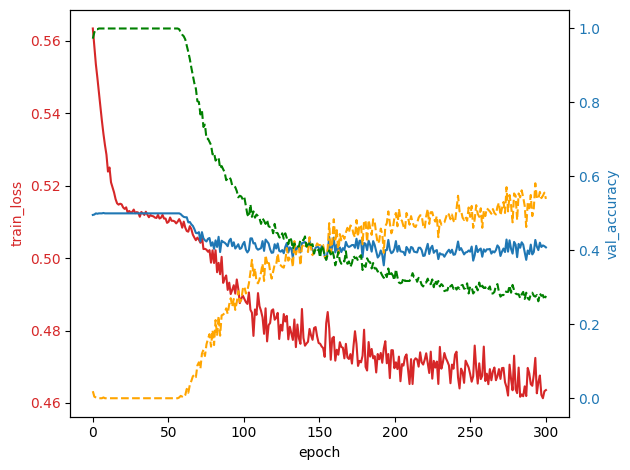

In [40]:
fig, ax1 = plt.subplots()

t = np.linspace(0, n_epochs, n_epochs)

color = 'tab:red'
ax1.set_xlabel('epoch')
ax1.set_ylabel('train_loss', color=color)
ax1.plot(t, train_loss, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('val_accuracy', color=color)  # we already handled the x-label with ax1
ax2.plot(t, val_accuracy, color=color)
ax2.plot(t, neg_val_accuracy, "--", color="orange")
ax2.plot(t, pos_val_accuracy, "--", color="green")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()